In [138]:
import numpy as np
import pandas as pd
import mysql.connector as sqlconn

In [139]:
myconn = sqlconn.connect(
    host = 'localhost',
    username = 'root',
    password = '',
    port = '3306',
    database = 'air_temp'
)

In [140]:
curs = myconn.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

In [141]:
tabel = sql_table(
    '''
    select *
    from percent_50
    '''
)

tabel.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


In [142]:
df = pd.DataFrame(tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     30 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [144]:
# Change air_temp and actual_temp to float64
df['air_temp'] = pd.to_numeric(df['air_temp'])
df['actual_temp'] = pd.to_numeric(df['actual_temp'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     30 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


Check duplicated

In [146]:
df[df.duplicated()]

,id,air_temp,actual_temp


check null value

In [147]:
df.isnull().sum()

id              0
air_temp       30
actual_temp     0
dtype: int64

## Data Visualization & Statistics

In [148]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [149]:

x = df['id'].values.reshape(-1,1)
y = df['actual_temp'].values


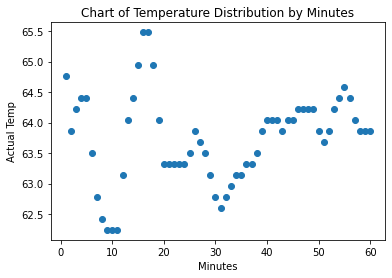

In [150]:
plt.scatter(x,y)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes')
plt.show()

In [151]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

print('Shape of X train : ', X_train.shape)
print('Shape of y train : ', y_train.shape)

print('Shape of X test : ', X_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of X train :  (30, 1)
Shape of y train :  (30,)
Shape of X test :  (30, 1)
Shape of y test :  (30,)


In [152]:

y_pred = regr.predict(X_test)
print('Y pred : ', y_pred)

Y pred :  [63.72219339 63.78341039 63.94665574 63.73579717 63.62016505 63.55894804
 63.7766085  63.93985385 63.81741984 63.69498583 63.57255182 63.61336316
 63.74940094 63.82422173 63.76980661 63.83782551 63.87863684 63.59295749
 63.64057071 63.76300472 63.88543873 63.74259906 63.83102362 63.91264629
 63.66777827 63.92625007 63.72899528 63.6473726  63.57935371 63.75620283]


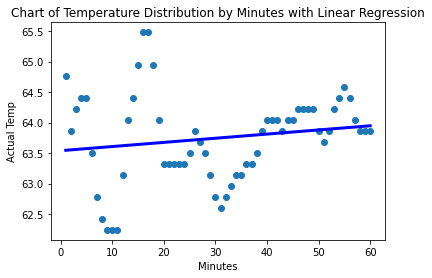

In [153]:
plt.scatter(x, y)
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes with Linear Regression')
plt.show()

# Calculating MSE. The lower value, the better it is. 0 means perfect prediction

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set :', mse)

Mean squared error of testing set : 0.5290202103557398


# Calculating MAE

In [155]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set : ', mae)

Mean absolute error of testing set :  0.5600940261183699


# Calculating RSME


In [156]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set : ', rmse)

Root Mean Squared Error of testing set :  0.7273377553487373


# Plotting y_test and y_pred

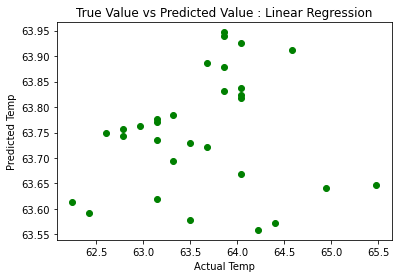

In [157]:
plt.scatter(y_test, y_pred, c = "green")
plt.xlabel('Actual Temp')
plt.ylabel('Predicted Temp')
plt.title('True Value vs Predicted Value : Linear Regression')
plt.show()

# Getting y_pred

In [172]:
# y_pred

df_y = pd.DataFrame(y_pred)

df_y

,0
0,63.722193
1,63.783410
2,63.946656
3,63.735797
4,63.620165
5,63.558948
6,63.776609
7,63.939854
8,63.817420
9,63.694986


In [165]:
new_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`percent_50` WHERE `air_temp` IS NULL LIMIT 0,1000
    '''
)

In [167]:
df = pd.DataFrame(new_tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,2,None,63.86
1,4,None,64.40
2,5,None,64.40
3,7,None,62.78
4,10,None,62.24


In [178]:
# df['air_temp'] = df['air_temp'].fillna(df_y.value_counts)
df

,id,air_temp,actual_temp
0,2,<bound method DataFrame.value_counts of ...,63.86
1,4,<bound method DataFrame.value_counts of ...,64.40
2,5,<bound method DataFrame.value_counts of ...,64.40
3,7,<bound method DataFrame.value_counts of ...,62.78
4,10,<bound method DataFrame.value_counts of ...,62.24
5,11,<bound method DataFrame.value_counts of ...,62.24
6,13,<bound method DataFrame.value_counts of ...,64.04
7,15,<bound method DataFrame.value_counts of ...,64.94
8,17,<bound method DataFrame.value_counts of ...,65.48
9,19,<bound method DataFrame.value_counts of ...,64.04
